## Question: Population Analysis 

* Which cities have the highest rate of pop. changes in 2018-2019? Which cities with the highest rate of pop changes in 2019-2020? Are the cities similar in both list? 
* Trend lines?
* Narrow down the sample city size (top 20, bottom 20), show bar graph 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
#reading csvs from cleaned data set
cleaned_pop_df = pd.read_csv("../CleanedData/cleaned_population.csv")
cleaned_rental_df = pd.read_csv("../CleanedData/cleaned_rental.csv")
cleaned_housing_df = pd.read_csv("../CleanedData/cleaned_inventory.csv")

#top&bottom csvs
T_pop1819 = pd.read_csv("../TopBottom/mostchangedpop18-19.csv")
T_pop1920 = pd.read_csv("../TopBottom/mostchangedpop19-20.csv")
B_pop1819 = pd.read_csv("../TopBottom/leastchangedpop18-19.csv")
B_pop1920 = pd.read_csv("../TopBottom/leastchangedpop19-20.csv")
T_house = pd.read_csv("../TopBottom/top10inventory.csv")
B_house = pd.read_csv("../TopBottom/bottom10inventory.csv")
T_rental = pd.read_csv("../TopBottom/top10rental.csv")
B_rental = pd.read_csv("../TopBottom/bottom10rental.csv")

max_rate_change = pd.read_csv("../TopBottom/mostratechange18-20.csv")
least_rate_change = pd.read_csv("../TopBottom/leastratechange18-20.csv")


#data set with changing rates
population_df = pd.read_csv("sorted_population.csv")
rental_df = pd.read_csv("../QuestionsAnalysis/rental_rate.csv")
housing_df = pd.read_csv("../QuestionsAnalysis/housing_rate.csv")
All_df =pd.read_csv("../QuestionsAnalysis/ChangingRates.csv")

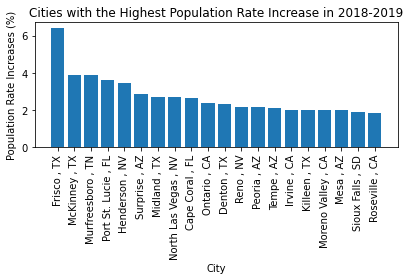

In [62]:
popTR1819 = T_pop1819["2018-2019 Population Rate"]
x_axis = np.arange(T_pop1819["City"].nunique())
plt.bar(x_axis, popTR1819)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(T_pop1819["City"]), rotation='vertical')
plt.title("Cities with the Highest Population Rate Increase in 2018-2019")
plt.xlabel("City")
plt.ylabel("Population Rate Increases (%)")
plt.tight_layout()
plt.savefig('../Output/Cities with the Highest Population Rate Increase in 2018-2019.png')
plt.show()


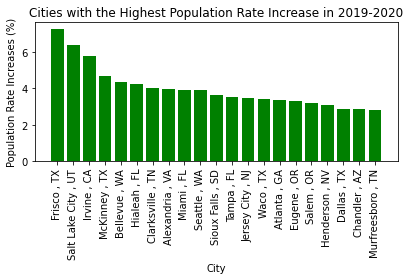

In [46]:
popTR1920 = T_pop1920["2019-2020 Population Rate"]
x_axis = np.arange(T_pop1920["City"].nunique())
plt.bar(x_axis, popTR1920,color="green")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(T_pop1920["City"]), rotation='vertical')
plt.title("Cities with the Highest Population Rate Increase in 2019-2020")
plt.xlabel("City")
plt.ylabel("Population Rate Increases (%)")
plt.tight_layout()
plt.savefig('../Output/Cities with the Highest Population Rate Increase in 2019-2020.png')
plt.show()


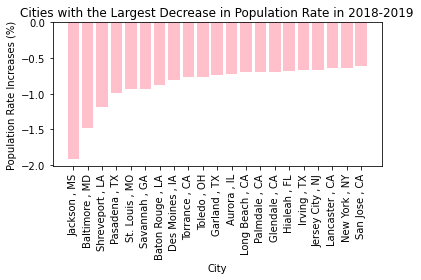

In [47]:
popBR1819 = B_pop1819["2018-2019 Population Rate"]
x_axis = np.arange(B_pop1819["City"].nunique())
plt.bar(x_axis, popBR1819, color="pink")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(B_pop1819["City"]), rotation='vertical')
plt.title("Cities with the Largest Decrease in Population Rate in 2018-2019")
plt.xlabel("City")
plt.ylabel("Population Rate Increases (%)")
plt.tight_layout()
plt.savefig('../Output/Cities with the Largest Decrease in Population Rate in 2018-2019.png')
plt.show()


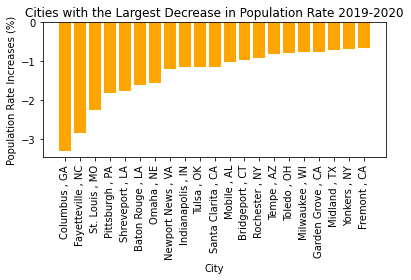

In [60]:
popBR1920 = B_pop1920["2019-2020 Population Rate"]
x_axis = np.arange(B_pop1920["City"].nunique())
plt.bar(x_axis, popBR1920, color="orange")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(B_pop1920["City"]), rotation='vertical')
plt.title("Cities with the Largest Decrease in Population Rate 2019-2020")
plt.xlabel("City")
plt.ylabel("Population Rate Increases (%)")
plt.tight_layout()

plt.savefig('../Output/Cities with the Largest Decrease in Population Rate in 2019-2020.png')
plt.show()

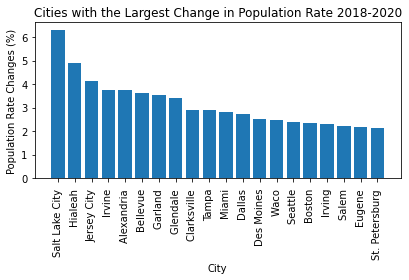

In [65]:
pop1 = max_rate_change["Diff in Pop Rate 2018-2020"]
x_axis = np.arange(max_rate_change["City"].nunique())
plt.bar(x_axis, pop1)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(max_rate_change["City"]), rotation='vertical')
plt.title("Cities with the Largest Change in Population Rate 2018-2020")
plt.xlabel("City")
plt.ylabel("Population Rate Changes (%)")
plt.tight_layout()
plt.savefig('../Output/Cities with the Largest Change in Population Rate 2018-2020.png')
plt.show()

#Are people moving into these cities? 

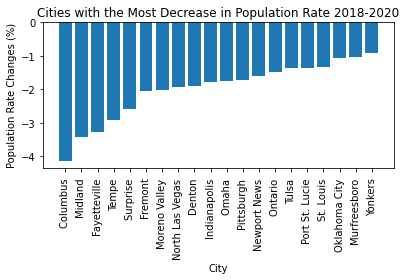

In [67]:
pop2 = least_rate_change["Diff in Pop Rate 2018-2020"]
x_axis = np.arange(least_rate_change["City"].nunique())
plt.bar(x_axis,pop2)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(least_rate_change["City"]), rotation='vertical')
plt.title("Cities with the Most Decrease in Population Rate 2018-2020")
plt.xlabel("City")
plt.ylabel("Population Rate Changes (%)")
plt.tight_layout()
plt.savefig('../Output/Cities with the Most Decrease in Population Rate 2018-2020.png')
plt.show()
#Are people moving out of these cities? 

In [20]:
T_pop1819["City"]=T_pop1819["City"]+", "+T_pop1819["State"]
T_pop1920["City"]=T_pop1920["City"]+", "+T_pop1920["State"]

popsummary_df = T_pop1819[["City"]]
popsummary_df["2018-2019 Rate"] = T_pop1819["2018-2019 Population Rate"]
popsummary_df["Top 20 Cities 2019-2020"] = T_pop1920["City"]
popsummary_df["2019-2020 Rate"] = T_pop1920["2019-2020 Population Rate"]
popsummary_df=popsummary_df.rename(columns={"City" : "Top 20 Cities 2018-2019"})

popsummary_df


,Top 20 Cities 2018-2019,2018-2019 Rate,Top 20 Cities 2019-2020,2019-2020 Rate
0,"Frisco , TX",6.387834,"Frisco , TX",7.267195
1,"McKinney , TX",3.874356,"Salt Lake City , UT",6.381907
2,"Murfreesboro , TN",3.858826,"Irvine , CA",5.760244
3,"Port St. Lucie , FL",3.612788,"McKinney , TX",4.674234
4,"Henderson , NV",3.447619,"Bellevue , WA",4.375557
5,"Surprise , AZ",2.866022,"Hialeah , FL",4.229469
6,"Midland , TX",2.718519,"Clarksville , TN",4.015277
7,"North Las Vegas , NV",2.700235,"Alexandria , VA",3.964172
8,"Cape Coral , FL",2.653218,"Miami , FL",3.937277
9,"Ontario , CA",2.374971,"Seattle , WA",3.909112


In [21]:
B_pop1819["City"]=B_pop1819["City"]+", "+B_pop1819["State"]
B_pop1920["City"]=B_pop1920["City"]+", "+B_pop1920["State"]

poplow_df = B_pop1819[["City"]]
poplow_df["2018-2019 Rate"] = B_pop1819["2018-2019 Population Rate"]
poplow_df["Bottom 20 Cities 2019-2020"] = B_pop1920["City"]
poplow_df["2019-2020 Rate"] = B_pop1920["2019-2020 Population Rate"]
poplow_df=poplow_df.rename(columns={"City" : "Bottom 20 Cities 2018-2019"})

poplow_df


,Bottom 20 Cities 2018-2019,2018-2019 Rate,Bottom 20 Cities 2019-2020,2019-2020 Rate
0,"Jackson , MS",-1.919742,"Columbus , GA",-3.306448
1,"Baltimore , MD",-1.486116,"Fayetteville , NC",-2.839972
2,"Shreveport , LA",-1.187157,"St. Louis , MO",-2.257000
3,"Pasadena , TX",-0.986034,"Pittsburgh , PA",-1.806944
4,"St. Louis , MO",-0.936988,"Shreveport , LA",-1.759909
5,"Savannah , GA",-0.927875,"Baton Rouge , LA",-1.605096
6,"Baton Rouge , LA",-0.879428,"Omaha , NE",-1.566316
7,"Des Moines , IA",-0.813449,"Newport News , VA",-1.205747
8,"Torrance , CA",-0.769837,"Indianapolis , IN",-1.161224
9,"Toledo , OH",-0.758557,"Tulsa , OK",-1.158304
